In [2]:
import itertools
import pandas as pd
import networkx as nx

#### Import Data

In [2]:
EDGE_COMPUTING_DF_PATH = "data/Google Scholars Data/EdgeComputingClean.csv"
df = pd.read_csv(EDGE_COMPUTING_DF_PATH)
df.head(3)

,Cites,Authors,Title,Year,Source,Publisher,ArticleURL,CitesURL,GSRank
0,17,"J Tatemura, W Hsiung, W Li",Acceleration of web service workflow execution...,2003,Proc. 13th Int'l World Wide Web Conf.(WWW),NaN,NaN,https://scholar.google.com/scholar?cites=85806...,8
1,5,"M Barra, R Grieco, D Malandrino, A Negro, V Sc...",TextToSpeech: an heavy-weight Edge computing S...,2003,Poster Proc. of,NaN,NaN,https://scholar.google.com/scholar?cites=68414...,19
2,195,"HH Pang, KL Tan",Authenticating query results in edge computing,2004,"Data Engineering, 2004. Proceedings. 20th …",ieeexplore.ieee.org,http://ieeexplore.ieee.org/abstract/document/1...,https://scholar.google.com/scholar?cites=14411...,1


In [3]:
def string_to_lst(string):
    return string.split(", ")

In [4]:
# Getting a list of lists (collaborations)
df['Authors List'] = df['Authors'].apply(string_to_lst)
author_colabs = []

for elem in df['Authors List']:
    author_colabs.append(elem)

In [5]:
# Cleaning list (certain names contain '…' [single character])
for colab_lst in author_colabs:
    for i in range(len(colab_lst)):
        if "…" in colab_lst[i]:
            colab_lst[i] = colab_lst[i][:-1]

#### Construct the Graph
- Nodes ~ Authors
- Connections ~ Collaborations

In [6]:
def make_edge_list(colab_lst):
    edges = []
    for i in range(len(colab_lst) - 1):
        node_1, node_2 = colab_lst[i], colab_lst[i + 1]
        edges.append((node_1, node_2))
    return edges

In [7]:
nodes = list(set(list(itertools.chain(*author_colabs[:200]))))

edges = []
for colab_lst in author_colabs[:200]:
    edges.extend(make_edge_list(colab_lst))

In [8]:
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

In [9]:
G_pyvis = Network(notebook=True)
G_pyvis.add_nodes(nodes)
G_pyvis.add_edges(edges)

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


#### Visualize Graph

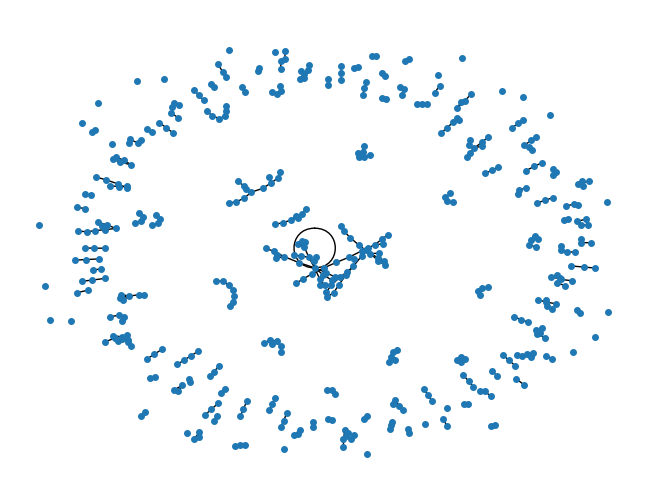

In [15]:
nx.draw(G, node_size = 16)

In [11]:
G_pyvis.show('edge_computing_collaboration_network.html')